# Haleema Sadia


# Task 9: HandWritten Equation Solver using CNN

# LGMVIP DATA SCIENCE INTERNSHIP JULY

In [30]:
#load libraries
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tensorflow.keras.utils import to_categorical
np.random.seed(1212)
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.models import model_from_json
from sklearn.preprocessing import OneHotEncoder
K.image_data_format()

'channels_last'

## Method to extract Data

In [2]:
#load data
def extract_data(folder,label):
    url = "C:\\Users\\92336\\Downloads\\aa(6)\\extracted_images\\"+folder+"\\"
    data = []
    i = 0
    count = 0
    for filename in os.listdir(url):
        #reading an image and converting it to grey scale
        image = cv2.imread(os.path.join(url, filename), cv2.IMREAD_GRAYSCALE)
        #inverting the pixels of an image
        image = ~image
        #check if the image is a valid image or not
        if image is not None:
            count+=1
            ret,thresh=cv2.threshold(image,127,255,cv2.THRESH_BINARY)
            #finding contour of the imahe
            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            #finding bounded rectangle
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            #width and height of image are set to 28
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            #crop the image
            croped_img= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            #resize the image
            resized_img = cv2.resize(croped_img,(28,28))
            #rehshape the image vector
            reshaped_img=np.reshape(resized_img,(784,1))
            #assign a label to an image
            data.append(reshaped_img)
            data[i] = np.append(data[i],[label])
            i+=1
            if (count == 4000):
                break
    return data
        

In [3]:
#loading data with labels
data_minus = extract_data("-",12)
data_plus = extract_data("+",13)
data_0 = extract_data("0",0)
data_1 = extract_data("1",1)
data_2 = extract_data("2",2)
data_3 = extract_data("3",3)
data_4 = extract_data("4",4)
data_5 = extract_data("5",5)
data_6 = extract_data("6",6)
data_7 = extract_data("7",7)
data_8 = extract_data("8",8)
data_9 = extract_data("9",9)
data_exp = extract_data("times",10)

## Converting itno one dataset

In [19]:
#creating one big dataset 
data = np.concatenate((data_minus,data_plus,data_0))
data = np.concatenate((data,data_1,data_2))
data = np.concatenate((data,data_3,data_4))
data = np.concatenate((data,data_5,data_6))
data = np.concatenate((data,data_7,data_8))
data = np.concatenate((data,data_exp,data_9))

In [20]:
#converting into a dataframe
df =pd.DataFrame(data,index=None)
#saving data into a csv file
df.to_csv('final_data.csv',index=False)

In [21]:
#now data is ready. let's view
df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,12
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,12
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,12
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,12
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,12


## X and Y 

In [22]:
#our dataset has 784 coloumns
#rename the 784 coloum to label
df.rename(columns = {784:'label'}, inplace = True)
df.head()



,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,label
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,12
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,12
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,12
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,12
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,12


## One hot Encoding Target Variable

In [32]:
df['label'] = df['label'].astype('category')
df["label_new"] = df['label'].cat.codes
enc = OneHotEncoder()
  
# Passing encoded columns
  
enc_data = pd.DataFrame(enc.fit_transform(
    df[['label_new']]).toarray())
  
y_train = enc_data

        0    1    2    3    4    5    6    7    8    9    10   11   12
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
47623  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
47624  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
47625  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
47626  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
47627  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0

[47628 rows x 13 columns]


In [33]:
#drop the labels coloumn and assign to x
df = df.drop(['label','label_new'],axis =1)
x_train = df

In [34]:
print(x_train)


       0    1    2    3    4    5    6    7    8    9    ...  774  775  776  \
0      255  255  255  255  255  255  255  255  255  255  ...    0    0    0   
1      255  255  255  255  255  255  255  255  255  255  ...    0    0    0   
2      255  255  255  255  255  255  255  255  255  255  ...    0    0    0   
3      255  255  255  255  255  255  255  255  255  255  ...    0    0    0   
4      255  255  255  255  255  255  255  255  255  255  ...    0    0    0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
47623    0    0    0    0    0    0    7   77  151  178  ...    0    0    0   
47624    0    0    0    0    0    0    0    0    0    0  ...    0    0    0   
47625    0    0   57   77  129  178  178  178  178  178  ...    0    0    0   
47626    0    0   64  152  178  178  124   41    0    0  ...    0    0    0   
47627    0    0    0    0    0    0    0    0   40  147  ...  124    0    0   

       777  778  779  780  781  782  783  
0       

In [35]:
x_train = np.array(x_train)
x_train = x_train.reshape(x_train.shape[0],28,28,1)

## building the model

In [36]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 15)        4335      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 15)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 15)          0         
_________________________________________________________________
flatten (Flatten)            (None, 540)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               6

## Training the model

In [38]:
history = model.fit(x_train, y_train, epochs=10,verbose=1,batch_size = 200,validation_split = 0.05,shuffle = True)

Epoch 1/10
227/227 [==============================] - 21s 90ms/step - loss: 1.0922 - accuracy: 0.7161 - val_loss: 0.6616 - val_accuracy: 0.7855
Epoch 2/10
227/227 [==============================] - 20s 88ms/step - loss: 0.2209 - accuracy: 0.9337 - val_loss: 0.3344 - val_accuracy: 0.8984
Epoch 3/10
227/227 [==============================] - 20s 89ms/step - loss: 0.1293 - accuracy: 0.9627 - val_loss: 0.3251 - val_accuracy: 0.9039
Epoch 4/10
227/227 [==============================] - 20s 89ms/step - loss: 0.0921 - accuracy: 0.9731 - val_loss: 0.1127 - val_accuracy: 0.9736
Epoch 5/10
227/227 [==============================] - 20s 88ms/step - loss: 0.0702 - accuracy: 0.9792 - val_loss: 0.0966 - val_accuracy: 0.9710
Epoch 6/10
227/227 [==============================] - 21s 91ms/step - loss: 0.0566 - accuracy: 0.9828 - val_loss: 0.0517 - val_accuracy: 0.9861
Epoch 7/10
227/227 [==============================] - 20s 89ms/step - loss: 0.0469 - accuracy: 0.9861 - val_loss: 0.0366 - val_accuracy:

## learning curve

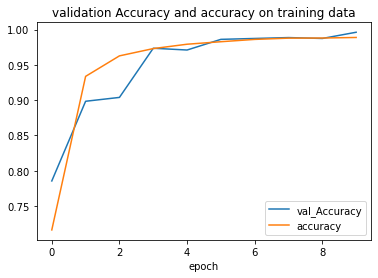

In [39]:
h = history.history
val_acc = h['val_accuracy']
acc = h['accuracy']
plt.plot(val_acc,label = "val_Accuracy")
plt.plot(acc,label = "accuracy")
plt.title("validation Accuracy and accuracy on training data")
plt.xlabel('epoch')
plt.legend()
plt.show()

## Saving the model

In [48]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

## loading the saved model

In [43]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")

## Prediction on test image

In [40]:
#reading test image and making it ready for prediction
test_img = cv2.imread('test.jpeg',cv2.IMREAD_GRAYSCALE)
if test_img is not None:
    #invert pixls of image
    test_img = ~ test_img
    ret,thresh=cv2.threshold(test_img,127,255,cv2.THRESH_BINARY)
    #finding contour of the imahe
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
    #finding bounded rectangle
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    #width and height of image are set to 28
    w=int(28)
    h=int(28)
    rects=[]
    data=[]
    for c in cnt:
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    #print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    #print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    #print(len(dump_rect)) 
    final_rect=[i for i in rects if i not in dump_rect]
    #print(final_rect)
      #print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]
        im_resize = cv2.resize(im_crop,(28,28))
        cv2.imshow("work",im_resize)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

        im_resize=np.reshape(im_resize,(1,28,28))
        data.append(im_resize)

In [49]:

result = ''
for i in range(len(data)):
    data[i] = np.array(data[i])
    data[i] = data[i].reshape(1,28,28,1)
    prediction = np.argmax(model.predict(data[i]), axis=-1)
    if (prediction[0] ==0):
        result+='0'
    elif(prediction[0] == 1):
        result+='1'
    elif(prediction[0] == 2):
        result+='2'
    elif(prediction[0] == 3):
        result+='3'
    elif(prediction[0] == 4):
        result+='4'
    elif(prediction[0] == 5):
        result+='5'
    elif(prediction[0] == 6):
        result+='6'
    elif(prediction[0] == 7):
        result+='7'
    elif(prediction[0] == 8):
        result+='8'
    elif(prediction[0] == 9):
        result+='9'
    elif(prediction[0] == 12):
        result+='+'
    elif(prediction[0] == 13):
        result+='-'
    elif(prediction[0] == 10):
        result+='*'
    else:
        result = result
print(result)
print("result is: ",eval(result))
    

12+1
result is:  13


## expected Output was 13 and Model predicted 13. It is working fine :)